# **Final Workout**

---



##1) Summary of ML SESSION in Conversation
    Hello Sir I'm perarasi

***Interviewer :*** Yes, Take your seat

***Me :*** Thank You Sir !!


***Interviewer :*** Can u say "What is machine learning" ?

***Me :*** Machine learning (ML) is a branch of artificial intelligence (AI) that focuses on building applications that can automatically and periodically learn and improve from experience without being explicitly programmed.

***Interviewer :*** Ok, Can you say some thing about the recent achivements of ML..?

***Me :***
*  GPT3 - OpenAI
*  Alphafold AI - deepmind
*  Deepfake

***Interviewer :*** What are the types of machine learning  ?

***Me :***
* Supervised
* Unsupervised
* Reinforcement

***Interviewer :*** Mention some ML libraries in python.

***Me :*** Numpy , pandas , sklearn , keras , matplotlib , TensorFlow etc...


***Interviewer :***
         Define the term Overfitting , Underfitting , Good Balance in Machine Learning.

***Me :*** 
      To say in simple words,

Overfitting: Good performance on the training data, poor generliazation to other data. 

Underfitting: Poor performance on the training data and poor generalization to other data.

Good Balance: Good performance on the training data and good generalization to other data.

***Interviewer :***
        Good !! In how many dimensions we view in ML?

***Me :*** Multi-Dimension..

***Interviewer :*** 
      Then, state Curse of dimensionality..

***Me :***
The curse of dimensionality basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimensions.

***Interviewer :***
Mention some clustering algorithm.

***Me :***

 * K-means clustering
 * K-medians clustering
 * Hierarchical clustering


**Interviewer :**
 What is Perceptron ?

***Me :***
   It is a simple artificial Neural Networks.

***Interviewer :***
   State Hebbs Rule Formula.

***Me :*** y = w1 * x1 + w2 * x2 + Bias.

**Interviewer :**
   What is Gradient Descent in ML ?

***Me :*** Gradient Descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is basically used for updating the parameters of the learning model.

Algorithm like Stochastic Gradient Descent used.

***Interviewer :***
How does back propagation work?

***Me :***
The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.

***Interviewer :*** Ok We will come back to you.

***Me :*** Ok Sir..!! Thank You..!! 



***Me :*** These are some of my work..Sir !!

##2) [i] Supervised Learning

---



Using the breast cancer dataset from the sklearn.datasets module.

Classification is done using **K nearest Neighbor Alogrithm**

The dataset classifies tumors into two categories (malignant and benign) and contains something like 30 features.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Using our newly trained model, we predict whether a tumor is benign or not given its mean compactness and area.

In [ ]:
y_pred = knn.predict(X_test)

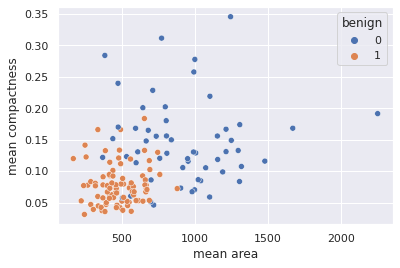

In [ ]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

Another way of evaluating our model is to compute the confusion matrix.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

Given our confusion matrix, our model has an accuracy of 121/143 = 84.6%.

##2nd Example :

* We are going to use the famous iris data set for our KNN Example.

* The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To import the dataset and load it into our pandas dataframe.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The next step is to split our dataset into its attributes and labels. 

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training and Predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

Evaluating the Algorithm 

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



## [ii] Unsupervised Learning

---



This program uses simple linear regression, which is a basic machine learning algorithm, to predict the SAT score of a given student, based on the student's GPA using small datasets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction

In [ ]:
y_pred = regressor.predict(X_test)

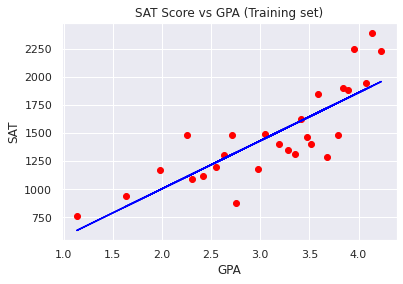

In [ ]:
plt.title('SAT Score vs GPA (Training set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()

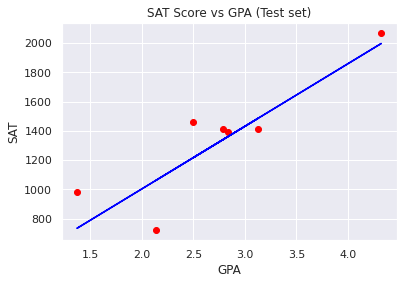

In [ ]:
plt.title('SAT Score vs GPA (Test set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.show()

Output:

In [ ]:
print("Enter GPA (a number between 0 and 5, inclusive):")
x = float(input())
if x >= 0 and x <= 5:
  print("Predicted SAT score:", int(round(regressor.predict([[x]])[0])))
else: print("Invalid GPA")

Enter GPA (a number between 0 and 5, inclusive):
4.2
Predicted SAT score: 1943


#3) Simple Neural Network

---





###Identifying Images from the CIFAR-10 Dataset using CNNs

keras imports for the dataset and building our neural network

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

loading the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


building the input vector from the 32x32 pixels

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


Normalizing the data to help with the training

In [ ]:
X_train /= 255
X_test /= 255

one-hot encoding using keras' numpy-related utilities

In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


Building a linear stack of layers with the sequential model

In [ ]:
model = Sequential()

convolutional layer

In [ ]:
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

convolutional layer

In [ ]:
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

flatten output of conv

In [ ]:
model.add(Flatten())

hidden layer

In [ ]:
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

output layer

In [ ]:
model.add(Dense(10, activation='softmax'))

compiling the sequential model

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

training the model for 10 epochs

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 447s 1s/step - loss: 1.6506 - accuracy: 0.4263 - val_loss: 1.5312 - val_accuracy: 0.4793
Epoch 2/10
391/391 [==============================] - 448s 1s/step - loss: 1.4948 - accuracy: 0.4857 - val_loss: 1.4289 - val_accuracy: 0.5069
Epoch 3/10
391/391 [==============================] - 448s 1s/step - loss: 1.3719 - accuracy: 0.5325 - val_loss: 1.3225 - val_accuracy: 0.5555
Epoch 4/10
391/391 [==============================] - 446s 1s/step - loss: 1.2773 - accuracy: 0.5641 - val_loss: 1.2449 - val_accuracy: 0.5768
Epoch 5/10
391/391 [==============================] - 444s 1s/step - loss: 1.1962 - accuracy: 0.5956 - val_loss: 1.1759 - val_accuracy: 0.6277
Epoch 6/10
391/391 [==============================] - 444s 1s/step - loss: 1.1286 - accuracy: 0.6281 - val_loss: 1.1240 - val_accuracy: 0.6661
Epoch 7/10
391/391 [==============================] - 444s 1s/step - loss: 1.0578 - accuracy: 0.6722 - val_loss: 1.0681 - val_accuracy: 0.6839

In [ ]:
X_new = X_test[:9]
y_prob = model.predict(X_new).round(2)
y_prob

array([[0.  , 0.  , 0.03, 0.39, 0.02, 0.51, 0.02, 0.02, 0.  , 0.  ],
       [0.08, 0.54, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.28, 0.08],
       [0.15, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.01],
       [0.56, 0.06, 0.07, 0.02, 0.03, 0.01, 0.01, 0.01, 0.23, 0.01],
       [0.  , 0.  , 0.02, 0.04, 0.02, 0.01, 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.04, 0.02, 0.01, 0.91, 0.  , 0.  , 0.  ],
       [0.05, 0.38, 0.02, 0.06, 0.02, 0.03, 0.04, 0.02, 0.06, 0.33],
       [0.  , 0.01, 0.03, 0.05, 0.03, 0.01, 0.87, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.39, 0.03, 0.49, 0.02, 0.02, 0.  , 0.  ]],
      dtype=float32)

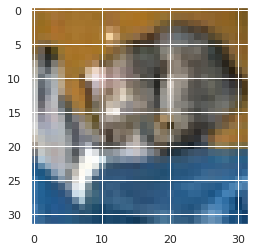

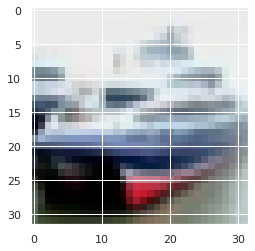

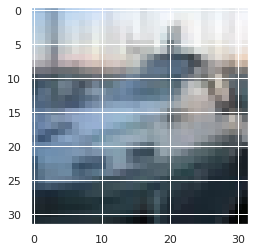

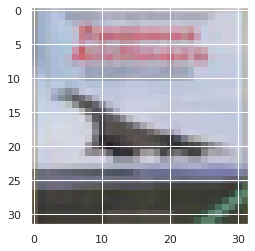

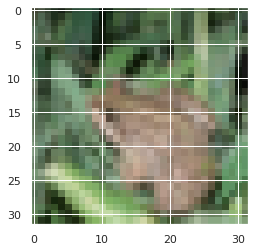

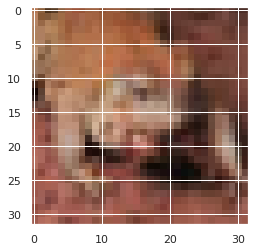

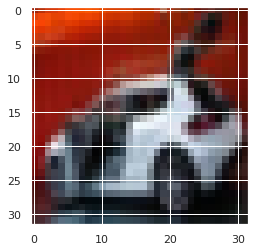

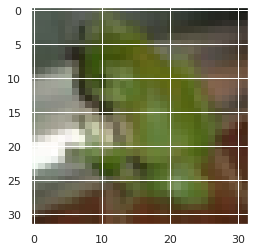

In [ ]:
image = X_test[:8]
for i in image:
  fig = plt.figure
  # plt.imshow(i, cmap='gray')
  plt.imshow(i  )
  plt.show()

---
#Thank You !!


